In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [3]:
df = pd.read_csv('fraud_data.csv')

In [4]:
df.head()

,trans_date_trans_time,merchant,category,amt,city,state,lat,long,city_pop,job,dob,trans_num,merch_lat,merch_long,is_fraud
0,04-01-2019 00:58,"""Stokes, Christiansen and Sipes""",grocery_net,14.37,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,a3806e984cec6ac0096d8184c64ad3a1,65.654142,-164.722603,1
1,04-01-2019 15:06,Predovic Inc,shopping_net,966.11,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,a59185fe1b9ccf21323f581d7477573f,65.468863,-165.473127,1
2,04-01-2019 22:37,Wisozk and Sons,misc_pos,49.61,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,86ba3a888b42cd3925881fa34177b4e0,65.347667,-165.914542,1
3,04-01-2019 23:06,Murray-Smitham,grocery_pos,295.26,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,3a068fe1d856f0ecedbed33e4b5f4496,64.445035,-166.080207,1
4,04-01-2019 23:59,Friesen Lt,health_fitness,18.17,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,891cdd1191028759dc20dc224347a0ff,65.447094,-165.446843,1


In [5]:
df.describe()

,amt,lat,long,city_pop,merch_lat,merch_long
count,14446.000000,14446.000000,14446.000000,1.444600e+04,14446.000000,14446.000000
mean,124.430073,39.787692,-110.874225,1.065370e+05,39.787991,-110.874892
std,231.352587,5.317039,12.985813,2.902916e+05,5.360593,12.995596
min,1.000000,20.027100,-165.672300,4.600000e+01,19.032689,-166.670685
25%,12.080000,36.715400,-120.415800,4.930000e+02,36.794655,-120.146253
50%,51.520000,39.666200,-111.098500,1.645000e+03,39.620953,-111.192629
75%,101.030000,41.940400,-101.136000,3.543900e+04,42.275740,-100.446822
max,3261.470000,66.693300,-89.628700,2.383912e+06,67.510267,-88.646366


In [7]:
df.describe(include='O')

,trans_date_trans_time,merchant,category,city,state,job,dob,trans_num,is_fraud
count,14446,14446,14446,14446,14446,14446,14446,14446,14446
unique,12126,693,14,176,13,163,187,14383,4
top,26-12-2020 23:29,Kilback LLC,grocery_pos,Phoenix,CA,"""Surveyor, minerals""",17-07-1989,a3806e984cec6ac0096d8184c64ad3a1,0
freq,5,58,1602,297,3375,262,197,2,12600


## Cleanning the Data

In [8]:
df['is_fraud'].unique()

array(['1', '1"2020-12-24 16:56:24"', '0', '0"2019-01-01 00:00:44"'],
      dtype=object)

#### Delete the outlier

In [9]:
df = df.drop(df[df['is_fraud']=='1"2020-12-24 16:56:24"'].index)
df = df.drop(df[df['is_fraud']=='0"2019-01-01 00:00:44"'].index)

In [10]:
df['is_fraud'].unique()

array(['1', '0'], dtype=object)

#### check if there's any missing value

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14444 entries, 0 to 14445
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   trans_date_trans_time  14444 non-null  object 
 1   merchant               14444 non-null  object 
 2   category               14444 non-null  object 
 3   amt                    14444 non-null  float64
 4   city                   14444 non-null  object 
 5   state                  14444 non-null  object 
 6   lat                    14444 non-null  float64
 7   long                   14444 non-null  float64
 8   city_pop               14444 non-null  int64  
 9   job                    14444 non-null  object 
 10  dob                    14444 non-null  object 
 11  trans_num              14444 non-null  object 
 12  merch_lat              14444 non-null  float64
 13  merch_long             14444 non-null  float64
 14  is_fraud               14444 non-null  object 
dtypes:

In [13]:
df.isna().sum()

trans_date_trans_time    0
merchant                 0
category                 0
amt                      0
city                     0
state                    0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

## Exploratory Data Analysis

1. Check which merchants has the highest rate of fraudulent transactions.
2. Check which cities/states have the highest number of fraudulent transactions.
3. What time of day do fraudulent transactions take place

#### 1. Check which merchants have the highest rate of fraudulent transactions.

In [15]:
df['is_fraud'] = df['is_fraud'].astype('int')

In [20]:
fraud_by_merchant = df.groupby('merchant')['is_fraud'].mean().sort_values(ascending=False)
fraud_by_merchant

merchant
Brown PLC                            0.600000
Rempel Inc                           0.521739
Kunze Inc                            0.516129
Kerluke-Abshire                      0.514286
Emmerich-Luettgen                    0.500000
                                       ...   
"Medhurst, Cartwright and Ebert"     0.000000
Connelly-Carte                       0.000000
"McLaughlin, Armstrong and Koepp"    0.000000
Powlowski-Weimann                    0.000000
"Reinger, Weissnat and Strosin"      0.000000
Name: is_fraud, Length: 693, dtype: float64

Text(0, 0.5, 'Rate')

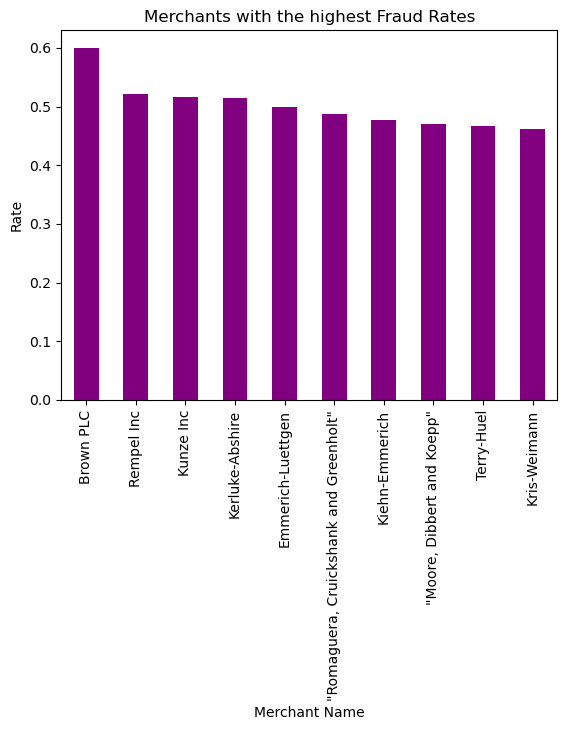

In [29]:
top_ten_fraud_by_merchant = fraud_by_merchant.head(10)
top_ten_fraud_by_merchant.plot(kind='bar', color='purple')
plt.title('Merchants with the highest Fraud Rates')
plt.xlabel('Merchant Name')
plt.ylabel('Rate')

**Observation**
1. We can see the top 10 merchants have the fraudulent transactions.

#### 2. Check which cities have the highest rate and count of fraudulent transactions

In [30]:
fraud_by_city = df.groupby('city')['is_fraud'].sum().sort_values(ascending=False)

In [33]:
top_fraud_by_city = fraud_by_city.head(20)
top_fraud_by_city

city
Wales            30
San Jose         27
Albuquerque      24
Thompson         24
Aurora           23
Westerville      22
Ravenna          22
Fort Washakie    21
Glendale         20
Mesa             20
Hubbell          19
Seattle          19
San Diego        18
Phoenix          17
North Loup       16
Sacramento       16
Bay City         15
Coulee Dam       15
Freedom          15
Mound City       15
Name: is_fraud, dtype: int64

Text(0, 0.5, 'Count')

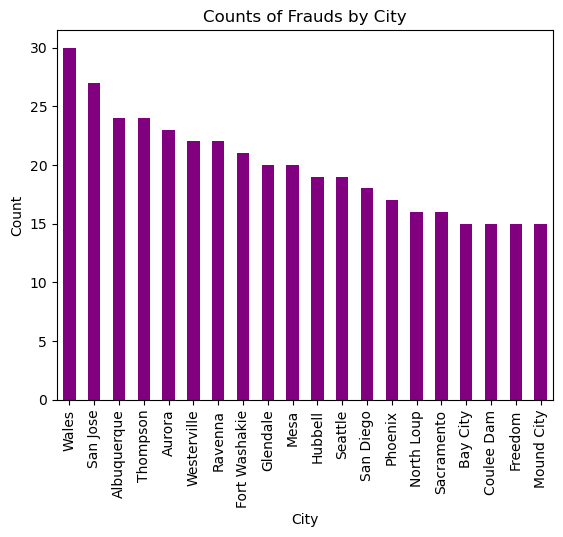

In [35]:
top_fraud_by_city.plot(kind='bar', color='purple')
plt.title('Counts of Frauds by City')
plt.xlabel('City')
plt.ylabel('Count')

In [36]:
fraud_by_city = df.groupby('city')['is_fraud'].mean().sort_values(ascending=False)

In [40]:
top_fraud_by_city = fraud_by_city.head(20)
top_fraud_by_city

city
Craig                        1.000000
La Grande                    1.000000
Downey                       1.000000
Wappapello                   1.000000
Angwin                       1.000000
Hubbell                      1.000000
Vacaville                    1.000000
Seligman                     1.000000
Seattle                      1.000000
Kaktovik                     1.000000
Pleasant Hill                1.000000
Kirtland                     1.000000
Coulee Dam                   1.000000
Buellton                     1.000000
Aurora                       0.489362
Yellowstone National Park    0.461538
Ravenna                      0.448980
Bay City                     0.416667
Valentine                    0.375000
Williamsburg                 0.371429
Name: is_fraud, dtype: float64

Text(0, 0.5, 'Ratio')

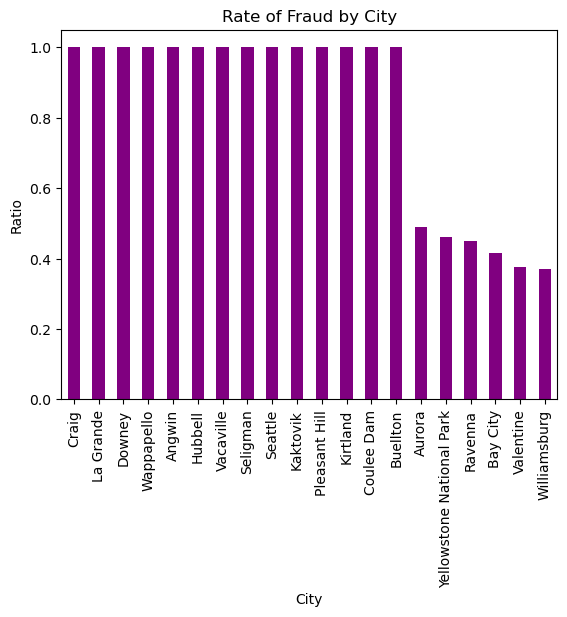

In [48]:
top_fraud_by_city.plot(kind='bar', color='purple')
plt.title('Rate of Fraud by City')
plt.xlabel('City')
#plt.xticks(rotation=85)
plt.ylabel('Ratio')

**Observations**
1. Craig, La Grande, Downey, Wappapello, Angwin, Hubell, Vacacille, Seligman, Seattle, Kaktovic, Pleasant Hill, Kirtland and Coulee Dam have the highest rate of fraud
2. In regards to raw count of the numbers, Wales, San Jose and Alburqueue have high counts but not neccessarily a high rate

#### 3. What time of day do fraudulent transactions happen the most?

In [51]:
df['date_time'] = pd.to_datetime(df['trans_date_trans_time'], format='%d-%m-%Y %H:%M')

In [54]:
df['hour'] = df['date_time'].dt.hour

In [56]:
fraudulent_hours = df.groupby('hour')['is_fraud'].mean().sort_values(ascending=False)
fraudulent_hours

hour
23    0.423111
22    0.417857
0     0.296422
1     0.283850
2     0.272553
3     0.260638
16    0.036753
15    0.035768
8     0.033493
20    0.032764
9     0.030227
18    0.030120
17    0.030030
12    0.027244
21    0.026012
14    0.025397
5     0.024631
10    0.023923
13    0.021944
7     0.020548
11    0.017413
4     0.016949
6     0.016867
19    0.016492
Name: is_fraud, dtype: float64

Text(0, 0.5, 'Rate')

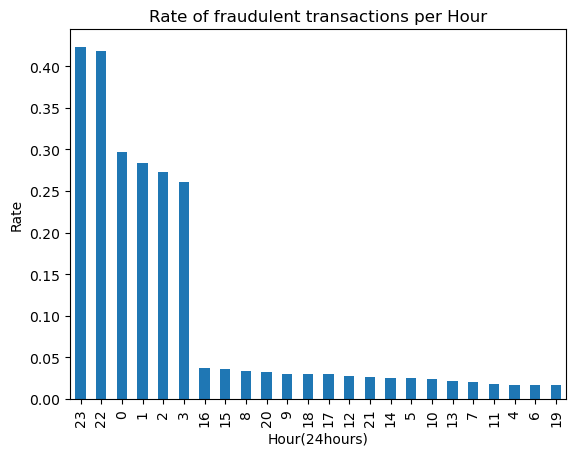

In [57]:
fraudulent_hours.plot(kind='bar')
plt.title('Rate of fraudulent transactions per Hour')
plt.xlabel('Hour(24hours)')
plt.ylabel('Rate')

#### Which months have high number of fraudulent transactions?

In [59]:
df['month'] = df['date_time'].dt.month_name()

In [62]:
fraudulent_months = df.groupby('month')['is_fraud'].sum().sort_values(ascending=False)

Text(0.5, 0, 'Month')

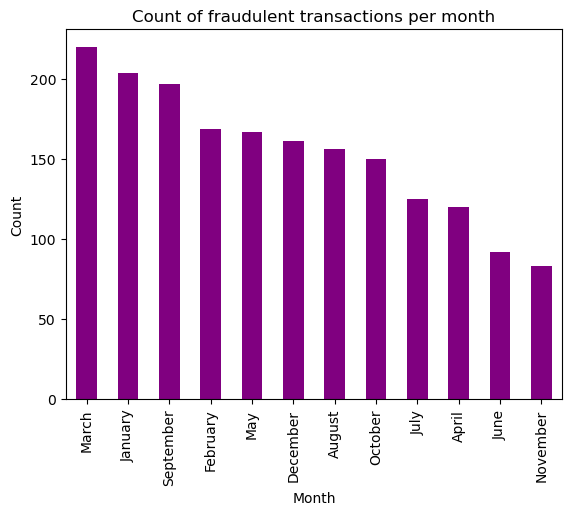

In [63]:
fraudulent_months.plot(kind='bar', color='purple')
plt.title('Count of fraudulent transactions per month')
plt.ylabel('Count')
plt.xlabel('Month')

**Observations**
1. Majority of fraudulent transactions happen between 10.00pm and 2.00a.m
2. March recorded the highest number of fraudulent transactions.


#### Which states record the highest number of fraudulent transactions?

Text(0, 0.5, 'Rate')

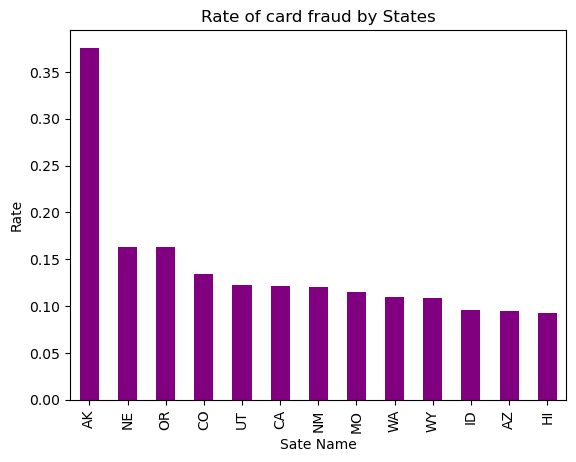

In [64]:
fraudulent_states = df.groupby('state')['is_fraud'].mean().sort_values(ascending=False)
fraudulent_states.plot(kind='bar', color='purple')
plt.title('Rate of card fraud by States')
plt.xlabel('Sate Name')
plt.ylabel('Rate')

#### Which categories of items record the highest rate of fraudulent transactions?

Text(0, 0.5, 'Rate')

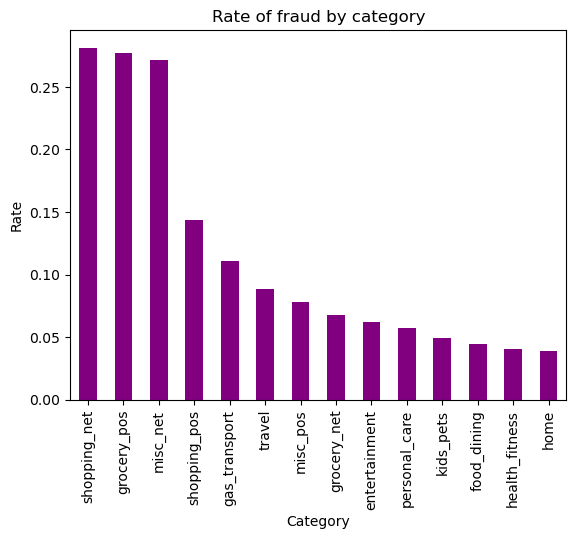

In [65]:
fraudulent_category = df.groupby('category')['is_fraud'].mean().sort_values(ascending=False)
fraudulent_category.plot(kind='bar', color='purple')
plt.title('Rate of fraud by category')
plt.xlabel('Category')
plt.ylabel('Rate')

#### Which job descriptions are most affected by fraud?

Text(0, 0.5, 'Rate')

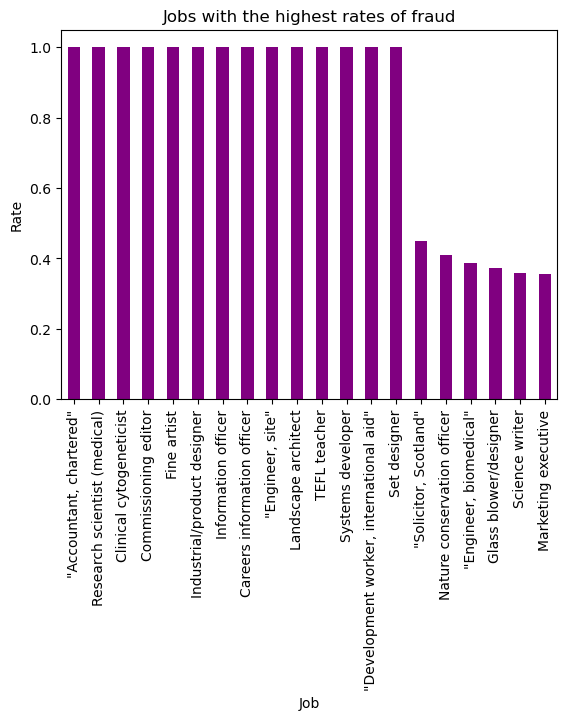

In [66]:
job_fraud = df.groupby('job')['is_fraud'].mean().sort_values(ascending=False)
top_ten_jobs = job_fraud.head(20)
top_ten_jobs.plot(kind='bar', color='purple')
plt.title('Jobs with the highest rates of fraud')
plt.xlabel('Job')
plt.ylabel('Rate')

#### Does fraudulent transactions occur among customers of certain age groups?

In [67]:
df['dob'] = pd.to_datetime(df['dob'], format='%d-%m-%Y')
df['yob'] = df['dob'].dt.year
df['age'] = 2019-df['yob']
bins = [0, 24, 39, 54, 74, float('inf')] 
labels = ['Gen Z', 'Millennials', 'Gen X', 'Baby Boomers', 'Silent Generation']
df['agegroup'] = pd.cut(df['age'], bins=bins, labels=labels, right=True)

Text(0, 0.5, 'Rate')

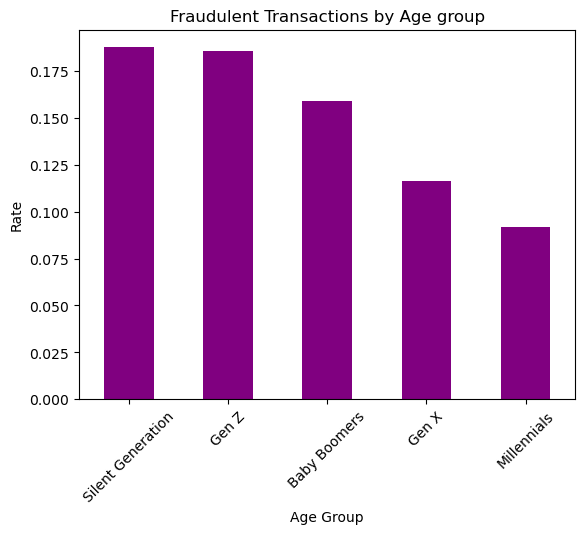

In [68]:
age_fraud = df.groupby('agegroup')['is_fraud'].mean().sort_values(ascending=False)
age_fraud.plot(kind='bar', color='purple')
plt.title('Fraudulent Transactions by Age group')
plt.xticks(rotation=45)
plt.xlabel('Age Group')
plt.ylabel('Rate')

In [71]:
pip install folium

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.4/108.4 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.9/83.9 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.3/133.3 kB 5.5 MB/s eta 0:00:00
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
Note: you may need to restart the kernel to use updated packages.


In [72]:
import folium
from folium.plugins import HeatMap

map_center = [df['lat'].mean(), df['long'].mean()]
m = folium.Map(location=map_center, zoom_start=5)

for _, row in df.iterrows():
    folium.Marker(
        location=[row['lat'], row['long']],
        popup=row['city'],
        icon=folium.Icon(color='blue', icon='info-sign')
    ).add_to(m)

# Save or display the map
m.save('map_from_dataframe_123.html')

In [73]:
df

,trans_date_trans_time,merchant,category,amt,city,state,lat,long,city_pop,job,...,trans_num,merch_lat,merch_long,is_fraud,date_time,hour,month,yob,age,agegroup
0,04-01-2019 00:58,"""Stokes, Christiansen and Sipes""",grocery_net,14.37,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",...,a3806e984cec6ac0096d8184c64ad3a1,65.654142,-164.722603,1,2019-01-04 00:58:00,0,January,1939,80,Silent Generation
1,04-01-2019 15:06,Predovic Inc,shopping_net,966.11,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",...,a59185fe1b9ccf21323f581d7477573f,65.468863,-165.473127,1,2019-01-04 15:06:00,15,January,1939,80,Silent Generation
2,04-01-2019 22:37,Wisozk and Sons,misc_pos,49.61,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",...,86ba3a888b42cd3925881fa34177b4e0,65.347667,-165.914542,1,2019-01-04 22:37:00,22,January,1939,80,Silent Generation
3,04-01-2019 23:06,Murray-Smitham,grocery_pos,295.26,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",...,3a068fe1d856f0ecedbed33e4b5f4496,64.445035,-166.080207,1,2019-01-04 23:06:00,23,January,1939,80,Silent Generation
4,04-01-2019 23:59,Friesen Lt,health_fitness,18.17,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",...,891cdd1191028759dc20dc224347a0ff,65.447094,-165.446843,1,2019-01-04 23:59:00,23,January,1939,80,Silent Generation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14441,22-01-2019 00:37,Hudson-Grady,shopping_pos,122.00,Athena,OR,45.8289,-118.4971,1302,Dealer,...,699a4c06b22711bf3e0d8ef91232d356,46.442439,-118.524214,0,2019-01-22 00:37:00,0,January,1976,43,Gen X
14442,22-01-2019 00:41,"""Nienow, Ankunding and Collie""",misc_pos,9.07,Gardiner,OR,43.7857,-124.1437,260,"""Engineer, maintenance""",...,080d620d24815c7d6c637cf0b71dde8e,42.901265,-124.995317,0,2019-01-22 00:41:00,0,January,1956,63,Baby Boomers
14443,22-01-2019 00:42,Pacocha-O'Reilly,grocery_pos,104.84,Alva,WY,44.6873,-104.4414,110,"""Administrator, local government""",...,3c346c8cd627c5fe3ed57430db2e9ae7,45.538062,-104.542117,0,2019-01-22 00:42:00,0,January,1973,46,Gen X
14444,22-01-2019 00:48,"""Bins, Balistreri and Beatty""",shopping_pos,268.16,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",...,e66ffcc95ba7fc490486242af1205d04,64.081462,-165.898698,0,2019-01-22 00:48:00,0,January,1939,80,Silent Generation


In [77]:
sns.countplot(df=df, x='is_fraud')

ValueError: Could not interpret input 'is_fraud'

In [75]:
df.dtypes

trans_date_trans_time            object
merchant                         object
category                         object
amt                             float64
city                             object
state                            object
lat                             float64
long                            float64
city_pop                          int64
job                              object
dob                      datetime64[ns]
trans_num                        object
merch_lat                       float64
merch_long                      float64
is_fraud                          int64
date_time                datetime64[ns]
hour                              int64
month                            object
yob                               int64
age                               int64
agegroup                       category
dtype: object